# 學習目標: 了解PCA基本原理，並知道如何使用PCA做降維。

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

## 建立&畫出練習用的data

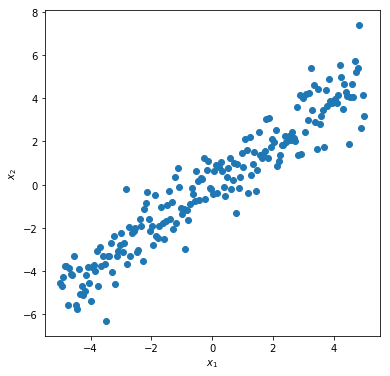

In [2]:
# 建立toy data
x1 = np.linspace(-5,5,200)
noise = np.random.normal(0,1.,len(x1))
x2 = x1 + noise

# 畫出toy data
plt.figure(figsize=(6,6))
plt.scatter(x1,x2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

寫一個函數來算data的variance:

In [4]:
variance = lambda x:np.sum( (x-x.mean() )**2 ) / ( len(x) - 1 )

看$\sigma^2_{x_1}$:

In [5]:
variance(x1)

8.459382338829828

看$\sigma^2_{x_2}$:

In [6]:
variance(x2)

8.795201767690985

看$\sigma^2_{tot} = \sigma^2_{x_1}+\sigma^2_{x_2}$:

In [7]:
tot_var = variance(x1) + variance(x2)
print(tot_var)

17.254584106520813


In [8]:
data = np.vstack((x1,x2)).T  # 資料組成一個Tensor
print(data.shape)

(200, 2)


## 使用PCA來降維度

In [9]:
pca = PCA(n_components=1)    # 模型將會把資料投影至一個方向
pca = pca.fit(data)          # 喂資料給模型。模型會根據資料特性，來尋找出恰當的方向向量

In [10]:
unit_vec = pca.components_   # 找到了方向向量
print(unit_vec)

[[0.69985155 0.71428833]]


In [11]:
reduced_data = np.dot(data, unit_vec.T )  # 將資料投影到找出來的"方向向量"上
# 現在，reduced_data即為降為後的資料

In [ ]:
# reduced_data = pca.transform(data)[0]   # 事實上，也可以直接用transform這個方法來得出降維後的資料

In [12]:
variance(reduced_data)                    # 對降維後的資料計算variance

16.85186131679279

我們發現，降維後的資料($x'_1$)，其variance和降維前資料的總variance是差不多的。

亦即: $\sigma^2_{x'_1}) \approx \sigma^2_{x_1}+\sigma^2_{x_2}$.

In [13]:
pca.explained_variance_         # 降維後，所有維度的總variance

array([16.85186132])

In [14]:
pca.explained_variance_ratio_   # 降維後，所有維度的總variance，佔降維度前的總variance有多少成分。

array([0.97665995])

```pca.explained_variance_ratio_```亦可用以下方式計算而得:

In [ ]:
# variance(reduced_data) / (variance(x1)+ variance(x2))

---

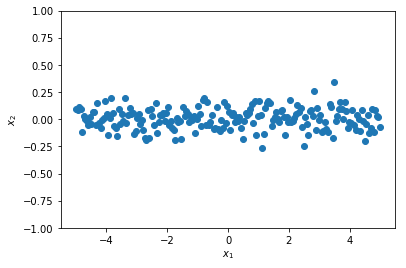

In [39]:
# 建立toy data
x1 = np.linspace(-5,5,200)
noise = np.random.normal(0,0.1,len(x1))
x2 =  noise

# 畫出toy data
plt.scatter(x1,x2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.ylim(-1,1)
plt.show()

練習：將以上資料做降維。

In [40]:
# pca = PCA(n_components=1)
# ...
# ...

In [41]:
print(variance(x1))
print(variance(x2))
tot_var = variance(x1) + variance(x2)
print(tot_var)

8.459382338829828
0.00985097006560006
8.469233308895427


In [42]:
data = np.vstack((x1,x2)).T  # 資料組成一個Tensor
print(data.shape)

(200, 2)


In [43]:
pca = PCA(n_components=1)    # 模型將會把資料投影至一個方向
pca = pca.fit(data)          # 喂資料給模型。模型會根據資料特性，來尋找出恰當的方向向量

In [44]:
unit_vec = pca.components_   # 找到了方向向量
print(unit_vec)

[[9.99999993e-01 1.14285636e-04]]


In [64]:
pca.transform(data).squeeze()

array([-4.99998955, -4.9497403 , -4.89948582, -4.84923627, -4.79900931,
       -4.74874112, -4.69849266, -4.6482439 , -4.59799722, -4.54773696,
       -4.49749353, -4.44722889, -4.39697848, -4.34674057, -4.29646653,
       -4.2462355 , -4.19599017, -4.14572981, -4.09547644, -4.04520782,
       -3.99497046, -3.94474144, -3.89447236, -3.84419954, -3.7939644 ,
       -3.74372659, -3.69347687, -3.64323471, -3.5929553 , -3.54271926,
       -3.49245723, -3.44221344, -3.39193817, -3.34171285, -3.29145341,
       -3.24119465, -3.19095039, -3.1406979 , -3.09046823, -3.04021422,
       -2.98994955, -2.93969328, -2.88945285, -2.83919808, -2.78895711,
       -2.73871421, -2.68846533, -2.63818174, -2.5879602 , -2.53767816,
       -2.48743442, -2.43719329, -2.3869188 , -2.3366985 , -2.28643627,
       -2.23617745, -2.18592631, -2.13567284, -2.08543031, -2.03516973,
       -1.98491207, -1.93468055, -1.8844249 , -1.83418097, -1.78393129,
       -1.73369119, -1.68341618, -1.63316953, -1.58291712, -1.53

In [62]:
reduced_data = pca.transform(data)

In [63]:
variance(reduced_data.squeeze())  

8.459382449190905